# Исследование надежности заемщиков.

### Шаг 1. Обзор данных

In [67]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки matplotlib для создания графиков
import matplotlib.pyplot as plt
# Загрузка таблицы в память переменной df типа dataframe
df_test = pd.read_csv('/datasets/data.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print("\033[1m\033[43m {}".format('----- Просмотр общей информации о dataframe -----'),"\033[0m")
df_test.info()
print("\033[1m\033[43m {}".format('----- Информация о заголовках полей dataframe -----'),"\033[0m")
print(df_test.columns)
print("\033[1m\033[43m {}".format('----- Информация о типах полей dataframe -----'),"\033[0m")
print(df_test.dtypes)
print("\033[1m\033[43m {}".format('----- Информация о размере dataframe -----'),"\033[0m")
print(df_test.shape)
# Копирование dataframe для дальнейшей возможности использования исходного датасета, работа будет производиться с копией
print("\033[1m\033[43m {}".format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),"\033[0m")
display(df_test.head())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
 ----- Информация о заголовках полей dataframe ----- 
Index(['children', 'days_employed', 'dob_years', 'education', 'ed

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### Шаг 2.1 Заполнение пропусков

<font color='DarkBlue'> 
📌 Исходя из вышеприведенных данных можно сделать вывод о том, что в полях 'days_employed' и 'total_income' есть пропуски значений. Сначала необходимо исследовать значения этих полей. Изначально рассматривается поле 'days_employed' <br>
📌 Также сходя из информации в первоначальной таблице можно сделать вывод о неверно указанных значениях в поле 'days_employed', они отрицательные, но после приведения к модулю будут принимать логичные значения в качестве количества отработанных в пересчете в года, например, 8438 / 365 = 23 года <br>
📌 Необходимо определить минимальное и максимальное значения в поле 'days_employed' среди существующих после приведения всех значений к модулю <br>
📌 Затем нужно вывести на экран строки с максимальными и минимальными значениями параметров, в выше приведенной таблице есть несоответствующие адекватному значению параметры <br>    
📌 Для более подробного визуального анализа нужно вывести график выборки всех значений поля в порядке возрастания, где по горизонтальной оси в порядке возрастания исследуемого значения будут располагаться индексы строк, а по вертикальной - значение каждого параметра. Для работы с графиками необходимо импортировть библиотеку matplotlib <br>        
📌 Необходимо определить количество явных дубликатов <br>    
📌 Отсутствие знаяений в поле 'days_employed' возможно связано с отсутствием значений в поле 'total_income', поэтому можно определить количество полей, где отсутствуют оба значения. Если оно равно количеству отсутствующих значений для одного из полей, следовательно, отсутствие значений проявляется всегда одновременно в обоих полях <br>
</font>

Минимальное значение рабочих дней: 24.14163324048118
Максимальное значение рабочих дней: 401755.40047533
-----
Записи с максимальным значением поля 'days_employed'


,days_employed,dob_years
7794,401663.850046,61
2156,401674.466633,60
7664,401675.093434,61
10006,401715.811749,69
6954,401755.400475,56


-----
Записи с минимальным значением поля 'days_employed'


,days_employed,dob_years
17437,24.141633,31
8336,24.240695,32
6157,30.195337,47
9683,33.520665,43
2127,34.701045,31


-----
Исходный график выборки значений поля 'days_employed'


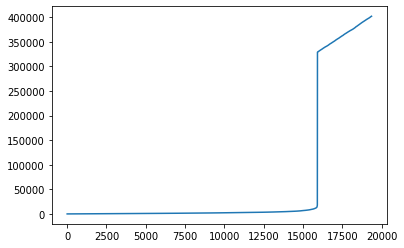

Гистограмма для грубой оценки наличия аномалий в значениях поля 'days_employed'


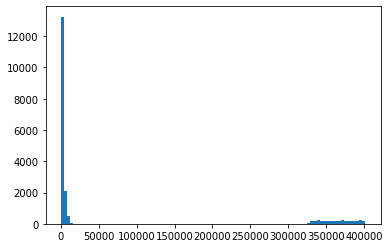

Количество явных дубликатов до обработки: 54
-----
Количество отсутствующих значений в поле 'days_employed' 2174
-----
Количество отсутствующих значений в полях 'days_employed' и 'total_income' 2174


In [68]:
# Приведение отрицательных значений из поля 'days_employed' к положительным с помощью функции для модуля
df_test['days_employed'] = abs(df_test['days_employed'])
print('Минимальное значение рабочих дней:',df_test['days_employed'].min())
print('Максимальное значение рабочих дней:',df_test['days_employed'].max())
print('-----')
print('Записи с максимальным значением поля \'days_employed\'')
display(df_test.loc[~df_test['days_employed'].isna(),['days_employed','dob_years']].sort_values(by='days_employed').tail())
print('-----')
print('Записи с минимальным значением поля \'days_employed\'')
display(df_test.loc[~df_test['days_employed'].isna(),['days_employed','dob_years']].sort_values(by='days_employed').head())
print('-----')
print('Исходный график выборки значений поля \'days_employed\'')
plt.plot(df_test['days_employed'].sort_values().reset_index(drop=True))
plt.show()
print('Гистограмма для грубой оценки наличия аномалий в значениях поля \'days_employed\'')
plt.hist(df_test['days_employed'], bins = 100)
plt.show()
print('Количество явных дубликатов до обработки:',df_test.duplicated().sum())
print('-----')
print('Количество отсутствующих значений в поле \'days_employed\'',df_test.loc[df_test['days_employed'].isna(),'dob_years'].count())
print('-----')
print('Количество отсутствующих значений в полях \'days_employed\' и \'total_income\'',df_test.loc[(df_test['total_income'].isna()) & (df_test['days_employed'].isna()),'dob_years'].count())

<font color='DarkBlue'> 
📌 Из полученных данных и графика видно, что параметр принимает значения менее 50000 и более 300000, что не является вероятным. Достаточно большое количество записей имеет ненулевое и аномальное значение параметра 'days_employed', следовательно нельзя их отбросить или заменить, если можно проанализировать эти значения. Чем более пологий график, тем более равномерно распределены значения. Если он более крутой в начале, то параметров с меньшим значением больше, если в конце - то больше параметров с большим значением. Так как он крутой в аномальной области, скорее всего данные представлены не в днях <br>
📌 Необходимо определить, есть ли зависимости и связаны ли аномалии со значениями других столбцов dataframe. Сначала можно проанализировать данные с отсутствующими значениями, затем с превышающими допустимые. <br>  
📌 Также можно определить минимальный и максимальный возраст клиентов для дальнейших анализов, так как количество отработанных дней имеет прямую зависимость с возрастом, по которой можно выявить аномалии. Можно построить график распределения значений по возрасту. <br>
📌 Для дальнейшего анализа поля 'days_employed' необходимо определить минимальное значение поля с некорректным параметром и разницу между максимальным значением, выявленным в предыдущем расчете, и минимальным для проведения соответствия. <br> 
📌 Для информации можно определить отношение количества отсутствующих значений ко всем в исходном датасете (оно одинаково для полей 'days_employed' и 'total_income', как было выявлено ранее) <br>
📌 Необходимо удалить явные дубликаты, чтобы исключить вероятность неверного анализа и обработки данных по графикам, средним арифметическим и медианным значениям, отклонениям и т.д. Для достоверности можно отобразить их количество после операции <br>
</font>    

Записи с отсутствующими значениями поля 'days_employed'


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


-----
Записи с максимальными аномальными значениями поля 'days_employed'


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью


-----
Записи с минимальными аномальными значениями поля 'days_employed'


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20444,0,328728.720605,72,среднее,1,вдовец / вдова,2,F,пенсионер,0,96519.339647,покупка жилья для семьи
9328,2,328734.923996,41,высшее,0,женат / замужем,0,M,пенсионер,0,126997.497760,операции со своей недвижимостью
17782,0,328771.341387,56,среднее,1,женат / замужем,0,F,пенсионер,0,68648.047062,операции с коммерческой недвижимостью
14783,0,328795.726728,62,высшее,0,женат / замужем,0,F,пенсионер,0,79940.196752,на покупку своего автомобиля
7229,1,328827.345667,32,среднее,1,гражданский брак,1,F,пенсионер,0,122162.965695,сыграть свадьбу


-----
Минимальное значение возраста: 0
-----
Максимальное значение возраста: 75
-----
Исходный график выборки значений поля 'dob_years'


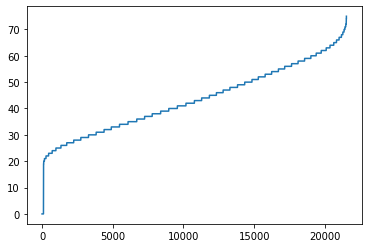

Минимальное аномальное значение количества отработанных дней: 328728.72060451825
-----
Разница между максимальным и минимальным значениями количества отработанных дней для аномальной выборки: 73026.67987081176
-----
Доля пропущенных значений в столбцах 'days_employed' и 'total_income': 0.10099883855981417
-----
Количество явных дубликатов после обработки: 0


In [69]:
# Аномалии и зависимости значений других полей для записей с отсутствием значения в поле 'days_employed',
print('Записи с отсутствующими значениями поля \'days_employed\'')
display(df_test[df_test['days_employed'].isna()].sort_values(by='days_employed').head())
print('-----')
# Аномалии и зависимости значений других полей для записей с большим значением в поле 'days_employed'
print('Записи с максимальными аномальными значениями поля \'days_employed\'')
display(df_test[df_test['days_employed'] > 300000].sort_values(by='days_employed').tail())
print('-----')
print('Записи с минимальными аномальными значениями поля \'days_employed\'')
display(df_test[df_test['days_employed'] > 300000].sort_values(by='days_employed').head())
print('-----')
print('Минимальное значение возраста:',df_test['dob_years'].min())
print('-----')
print('Максимальное значение возраста:',df_test['dob_years'].max())
print('-----')
print('Исходный график выборки значений поля \'dob_years\'')
plt.plot(df_test['dob_years'].sort_values().reset_index(drop=True))
plt.show()
print('Минимальное аномальное значение количества отработанных дней:',df_test.loc[df_test['days_employed'] > 300000,'days_employed'].min())
print('-----')
print('Разница между максимальным и минимальным значениями количества отработанных дней для аномальной выборки:',df_test.loc[df_test['days_employed'] > 300000,'days_employed'].max() - df_test.loc[df_test['days_employed'] > 300000,'days_employed'].min())
print('-----')
print('Доля пропущенных значений в столбцах \'days_employed\' и \'total_income\':', df_test['days_employed'].isna().mean())
print('-----')
df_test = df_test.drop_duplicates().reset_index(drop=True)
print('Количество явных дубликатов после обработки:',df_test.duplicated().sum())

<font color='DarkBlue'> 
📌 Так как минимальный возраст 0, следовательно необходимо отсечь эти значения, для определения действительно минимального возраста. Можно вывести первые записи с данными о самых молодых клиенах, имеющие некорректное значение в поле 'days_employed'. <br>
📌 Также можно вывести на экран первые записи о клиентах с нулевым значением возраста, чтобы выявить аномалии и зависимости со значениями других полей, а также определить количество этих значений в общем датасете <br>
📌 Разница между максимальным и минимальным значениями количества отработанных дней 73026 / 365 = 200 лет, невозможное значение скорее всего выражено в часах, поэтому полученное значение можно пересчитать, разделив на 24. Значение в десятичной системе исчисления, но возможно находится близко к граничным диапазонам типов данных 'uint8', 'int8', 'uint16', 'int16', 'uint32', 'int32' и образовано путем некорректного выполнения арифметических действий с изначально неверным типом. Можно дополнительно проверить их диапазоны.
</font>    

In [70]:
print('Записи с минимальными значениями поля \'dob_years\' при аномальных значениях поля \'days_employed\'')
display(df_test.loc[(df_test['days_employed'] > 300000) & (df_test['dob_years'] > 0), ['days_employed','dob_years']].sort_values(by='dob_years').head())
print('-----')
# Аномалии и зависимости значений других полей для записей с нулевым количеством лет в поле 'dob_years'
print('Записи с нулевыми значениями поля \'dob_years\'')
display(df_test[df_test['dob_years'] == 0].head())
print('-----')
print('Количество клиентов со значением возраста 0:',df_test.loc[df_test['dob_years'] == 0, 'dob_years'].count())
print('-----')
print('Отношение записей с возрастом 0 к количеству всех записей:',df_test.loc[df_test['dob_years'] == 0, 'dob_years'].count()/df_test['dob_years'].count())
print('-----')
print('Разница между максимальным и минимальным значениями количества отработанных дней для аномальной выборки:',(df_test.loc[df_test['days_employed'] > 300000,'days_employed'].max() - df_test.loc[df_test['days_employed'] > 300000,'days_employed'].min()) / 24)
print('-----')
import numpy as np
int_types = ["uint8", "int8", "uint16", "int16", "uint32", "int32"]
for i in int_types:
    print(np.iinfo(i))

Записи с минимальными значениями поля 'dob_years' при аномальных значениях поля 'days_employed'


,days_employed,dob_years
1242,334764.259831,22
16139,364348.197352,26
19395,389397.167577,26
12736,329781.704997,27
13931,376824.585817,27


-----
Записи с нулевыми значениями поля 'dob_years'


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль


-----
Количество клиентов со значением возраста 0: 101
-----
Отношение записей с возрастом 0 к количеству всех записей: 0.004704019374970891
-----
Разница между максимальным и минимальным значениями количества отработанных дней для аномальной выборки: 3042.7783279504897
-----
Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine

<font color='DarkBlue'> 
📌 Границы диапазонов типов данных находятся достаточно далеко от выявленных аномальных значений, значит проблема возникла не в результате преобразования типов данных. Разница между максимальным и минимальным значениями количества отработанных дней для аномальной выборки показывает реальное значение 3043 / 365 = 8 лет. Минимальный возраст для этой выборки - 22 года, значение 'days_employed' - 334764, а минимальное значение из аномальной выборки - 328728, значит логично, что его можно учитывать как нулевое. Следовательно, остальные аномальные значения можно указать как разницу между текущим значением и минимальным, являющимся нулевым, разделенную на 24. Затем можно убедиться в том, что максимальное значение не превышает невозможное и построить график изменения значений <br>
📌 Для анализа исходных данных можно определить медианное значение для полей 'days_employed', 'total_income' и 'dob_years'. <br>
📌 Также нужно заменить отсутствующие значения полей 'days_employed' и 'total_income' на медианное значение измененного датасета. Так как график намного более крутой в конечных точках, следует применять функцию нахождения медианного значения выборки, так как крайние значения могут оказать существенное влияние на усредненное значение методом нахождения среднего арифметического. <br>
📌 Нужно заменить нулевые значения в колонке возраста клиентов на медианные, так как в конечной точке график достаточно крутой, для нормализации общей картины последующего анализа. <br>
📌 Затем нужно отредактировать недостающие данные в поле 'total_income'. Для начального анализа нужно найти крайние значения выборки, вывести строки датасета с максимальными и минимальными параметрами рассматриваемого столбца и посторить график распределения значений <br>   
</font>     

Максимальное количество отработынных дней: 18388.949900568383
-----
График выборки значений поля 'days_employed' после приведения аномальных значений


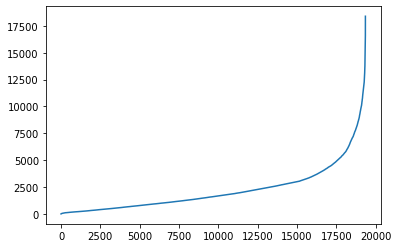

Медианное значение исходного поля 'days_employed' после устранения аномалий: 1604.249730074267
-----
Медианное значение исходного поля 'total_income': 145017.93753253992
-----
Медианное значение исходного поля 'dob_years': 42.0
-----
График выборки значений поля 'days_employed' после усреднения пропущенных значений


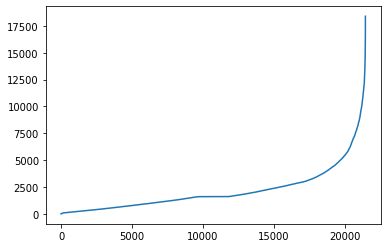

-----
График выборки значений поля 'days_employed' после усреднения нулевых значений


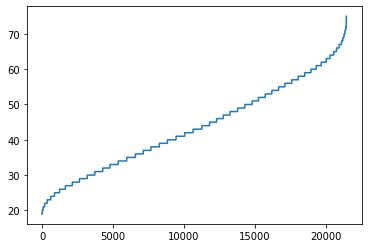

Минимальное значение дохода: 20667.26379327158
Максимальное значение дохода: 2265604.028722744
-----
Записи с максимальными значениями поля 'total_income'


,days_employed,dob_years,total_income
17147,5734.127087,42.0,1.711309e+06
20759,4719.273476,61.0,1.715018e+06
9163,5248.554336,35.0,1.726276e+06
19562,2577.664662,39.0,2.200852e+06
12396,1477.438114,44.0,2.265604e+06


-----
Записи с минимальными значениями поля 'total_income'


,days_employed,dob_years,total_income
14562,1270.430781,57.0,20667.263793
12989,1707.494521,37.0,21205.280566
16147,3642.820023,52.0,21367.648356
1598,1291.557650,68.0,21695.101789
14254,744.738882,61.0,21895.614355


-----
График выборки исходных значений поля 'total_income'


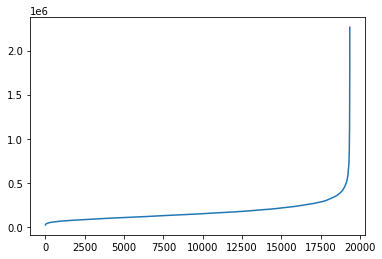

In [71]:
df_test.loc[df_test['days_employed'] > 300000,'days_employed'] = (df_test.loc[df_test['days_employed'] > 300000, 'days_employed'] - df_test.loc[df_test['days_employed'] > 300000,'days_employed'].min()) / 24
print('Максимальное количество отработынных дней:',df_test['days_employed'].max())
print('-----')
print('График выборки значений поля \'days_employed\' после приведения аномальных значений')
plt.plot(df_test['days_employed'].sort_values().reset_index(drop=True))
plt.show()
print('Медианное значение исходного поля \'days_employed\' после устранения аномалий:',df_test['days_employed'].median())
print('-----')
print('Медианное значение исходного поля \'total_income\':',df_test['total_income'].median())
print('-----')
print('Медианное значение исходного поля \'dob_years\':',df_test['dob_years'].median())
df_test['days_employed'] = df_test['days_employed'].fillna(df_test['days_employed'].median())
print('-----')
print('График выборки значений поля \'days_employed\' после усреднения пропущенных значений')
plt.plot(df_test['days_employed'].sort_values().reset_index(drop=True))
plt.show()
df_test['dob_years'] = df_test['dob_years'].replace(0,df_test.loc[df_test['dob_years'] != 0,'dob_years'].median())
print('-----')
print('График выборки значений поля \'days_employed\' после усреднения нулевых значений')
plt.plot(df_test['dob_years'].sort_values().reset_index(drop=True))
plt.show()
print('Минимальное значение дохода:',df_test['total_income'].min())
print('Максимальное значение дохода:',df_test['total_income'].max())
print('-----')
print('Записи с максимальными значениями поля \'total_income\'')
display(df_test.loc[~df_test['total_income'].isna(),['days_employed','dob_years','total_income']].sort_values(by='total_income').tail())
print('-----')
print('Записи с минимальными значениями поля \'total_income\'')
display(df_test.loc[~df_test['total_income'].isna(),['days_employed','dob_years','total_income']].sort_values(by='total_income').head())
print('-----')
print('График выборки исходных значений поля \'total_income\'')
plt.plot(df_test['total_income'].sort_values().reset_index(drop=True))
plt.show()

<font color='DarkBlue'> 
📌 Как видно из графика выше, новая медианная выборка представляет собой горизонтальную прямую с одинаковыми значениями в центре, также количество значений увеличилось по сравнению с первоначальным графиком <br>
📌 Нужно заменить отсутствующие значения в поле 'total_income' на медианные, так как в конечной точке график очень крутой, для последующего анализа, и вывести обновленный график на экран <br>
📌 Причиной появления пропусков в столбцах 'days_employed' и 'total_income' может являться отсутствие значения (скорее всего некорректно введенного) в одном из столбцов, что приводит к невозможности записи или сохранения данных во втором столбце. Также есть предположение об отсутствии трудового стажа и, соответственно, дохода, так как нет полей с нулевым трудовым стажем. Но в задании четко обозначено, что нужно заполнить пропуски медианным значением, следовательно, за основу берется первый вариант <br>
📌 Отрицательные значения в столбце 'days_employed' появились скорее всего по причине определения количества отработанных дней методом вычитания конечной даты из начальной, а не наоборот. Большие аномальные значения в данном поле могли появиться, так как изменился алгоритм подсчета даты: отсчет начинался с другого года, значения объявлены в часовом формате <br>
📌 Нулевые значения в поле 'dob_years' никак не связаны с остальными и их количество мало, что может свидетельствовать о возникновении некорректных данных в связи с присутствием явления человеческого фактора <br>
📌 Можно сделать вывод только по полям 'days_employed', 'total_income' и 'dob_years', что данные в датасете скорее всего некорректны, так как при изначально среднем количестве отработанных дней 1604 средняя зарплата составляет изначально 145 тыс. руб. (минимальная 20667, соответственно валютой являются рубли), что даже для Москвы является большим показателем, к тому же при парадоксально малом количестве рабочих дней в среднем, учитывая средний возраст исследуемых 42 года, значит данные в исходном датасете сгенерированы в соответствии с некорректно заданными правилами либо сфальцифицированы (среднее количество в данном контексте - медианное значение параметра)   
</font>    

График выборки значений поля 'total_income' после усреднения пропущенных значений


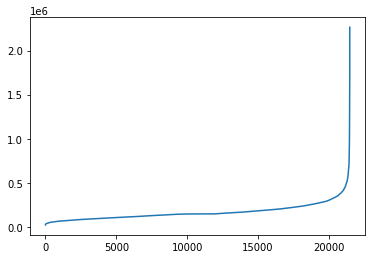

In [72]:
df_test['total_income'] = df_test['total_income'].fillna(df_test['total_income'].median())
print('График выборки значений поля \'total_income\' после усреднения пропущенных значений')
plt.plot(df_test['total_income'].sort_values().reset_index(drop=True))
plt.show()
# print('Медианное значение исходного поля \'days_employed\':',abs(df.loc[df['days_employed'] < 300000, 'days_employed']).median())

### Шаг 2.2 Проверка данных на аномалии и исправления.

<font color='DarkBlue'> 
📌 Нужно вывести общую информацию о столбцах dataframe. Предпочтительно выполнять соответствующие команды в начале анализа <br>
</font>    

In [73]:
for i in df_test:
    print(df_test[i].describe())
    print('-----')

count    21471.000000
mean         0.539565
std          1.382978
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64
-----
count    21471.000000
mean      2144.061264
std       2045.075406
min          0.000000
25%        839.813416
50%       1604.249730
75%       2694.941095
max      18388.949901
Name: days_employed, dtype: float64
-----
count    21471.000000
mean        43.481347
std         12.217235
min         19.000000
25%         33.500000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64
-----
count       21471
unique         15
top       среднее
freq        13705
Name: education, dtype: object
-----
count    21471.000000
mean         0.817195
std          0.548508
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: education_id, dtype: float64
-----
count               21471
uni

<font color='DarkBlue'> 
📌 Из указанных данных можно сделать вывод о некорректных значениях в поле количества детей у клиентов. Необходимо построить график распределения записей по данному параметру <br>
📌 Можно вывести на экран все уникальные значения полей 'education', 'family_status', 'gender', 'income_type', 'purpose' <br>
</font>   

График выборки исходных значений поля 'children'


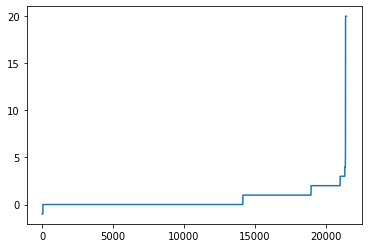

Уникальные значения поля 'education': ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Уникальные значения поля 'family_status': ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
Уникальные значения поля 'gender': ['F' 'M' 'XNA']
Уникальные значения поля 'income_type': ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
Уникальные значения поля 'purpose': ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного а

In [74]:
print('График выборки исходных значений поля \'children\'')
plt.plot(df_test['children'].sort_values().reset_index(drop=True))
plt.show()
print('Уникальные значения поля \'education\':',df_test['education'].unique())
print('Уникальные значения поля \'family_status\':',df_test['family_status'].unique())
print('Уникальные значения поля \'gender\':',df_test['gender'].unique())
print('Уникальные значения поля \'income_type\':',df_test['income_type'].unique())
print('Уникальные значения поля \'purpose\':',df_test['purpose'].unique())

<font color='DarkBlue'> 
📌 Аномальными значениями в поле 'children' являются значения '-1' и '20'. Необходимо рассмотреть количество подобных значений в датасете, а также средний возраст клиентов, которым принадлежат эти записи. Вероятно, при разумном для наличия детей возрасте соответствующих групп (30+), в первом случае ошибка в наличии знака '-', во втором - наличие лишнего '0', поэтому также можно проверить количество и средний возраст клиентов, имеющих 1 и 2 ребенка <br>
📌 Исходя из данных о полученном наборе параметров в поле 'education', необходимо привести текст к нижнему регистру и вывести снова все уникальные значения на экран <br>
📌 Также во встречающихся в датасете параметрах поля 'gender' присутствует нехарактерное значение пола 'XNA'. Необходимо определить количество строк с данной записью <br>
</font>   

In [75]:
print('Количеcтво записей с аномальным значением \'-1\' в поле \'children\'',df_test.loc[df_test['children'] < 0, 'children'].count())
print('Средний возраст клиентов с аномальным значением \'-1\' в поле \'children\'',df_test.loc[df_test['children'] < 0, 'dob_years'].median())
print('Количеcтво записей с аномальным значением \'20\' в поле \'children\'',df_test.loc[df_test['children'] == 20, 'children'].count())
print('Средний возраст клиентов с аномальным значением \'20\' в поле \'children\'',df_test.loc[df_test['children'] == 20, 'dob_years'].median())
print('Количеcтво записей со значением \'1\' в поле \'children\'',df_test.loc[df_test['children'] == 1, 'children'].count())
print('Средний возраст клиентов со значением \'1\' в поле \'children\'',df_test.loc[df_test['children'] == 1, 'dob_years'].median())
print('Количеcтво записей со значением \'2\' в поле \'children\'',df_test.loc[df_test['children'] == 2, 'children'].count())
print('Средний возраст клиентов со значением \'1\' в поле \'children\'',df_test.loc[df_test['children'] == 2, 'dob_years'].median())
print('-----')
df_test['education'] = df_test['education'].str.lower() 
print('Уникальные значения поле \'education\' после преобразования:',df_test['education'].unique())
print('-----')
print('Количеcтво записей со значением \'XNA\' в поле \'gender\':',df_test.loc[df_test['gender'] == 'XNA', 'gender'].count())

Количеcтво записей с аномальным значением '-1' в поле 'children' 47
Средний возраст клиентов с аномальным значением '-1' в поле 'children' 41.0
Количеcтво записей с аномальным значением '20' в поле 'children' 76
Средний возраст клиентов с аномальным значением '20' в поле 'children' 42.0
Количеcтво записей со значением '1' в поле 'children' 4809
Средний возраст клиентов со значением '1' в поле 'children' 38.0
Количеcтво записей со значением '2' в поле 'children' 2052
Средний возраст клиентов со значением '1' в поле 'children' 35.0
-----
Уникальные значения поле 'education' после преобразования: ['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
-----
Количеcтво записей со значением 'XNA' в поле 'gender': 1


<font color='DarkBlue'> 
📌 Значение '-1' в поле 'children' в среднем у людей в возрасте 41 года, поэтому можно убрать знак '-', значение '20' в поле 'children' у людей в возрасте 42 года, поэтому можно предположить, что должно быть значение '2', возможно оператор ошибся при наборе значения, скопировав неверное, число было указано в неверном формате или неверно отсканировалось значение в таблице. Вариантов может быть достаточно много. Желательно установить указанные значения, так как медианное значение '0' указывает на слишком большое количество бездетных, что не отражает действительность. Можно снова вывести на экран график <br>
📌 Предполагается указать вместо неизвестного параметра пола наиболее вероятное встречающееся значение 'F', учитывая, что все виды занятости подходят как для мужчин, так и для женщин. Перед этим можно вывести на экран запись с неверно указанным полом <br>
📌 Можно проверить корректность соответствия значений в полях 'education_id' и 'education', 'family_status' и 'family_status_id' сначала по количеству записей, создав функцию для упрощения последующих вызовов алгоритма перебора значений <br>
</font> 

-----
График выборки значений поля 'children' после модификации значений столбца


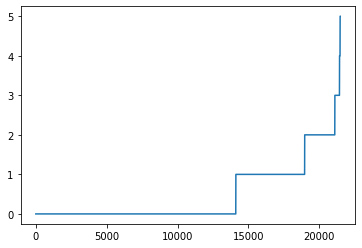

-----
Исходные записи с некорректными значениями поля 'gender'


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10690,0,2358.600502,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


-----
Количество записей с некорректными значениями поля 'gender' после преобразования: 0
Соответствие количества идентификаторов для значений следующих полей
----- education -----
высшее - 5251
среднее - 15188
неоконченное высшее - 744
начальное - 282
ученая степень - 6
----- education_id -----
0 - 5251
1 - 15188
2 - 744
3 - 282
4 - 6
----- family_status -----
женат / замужем - 12344
гражданский брак - 4163
вдовец / вдова - 959
в разводе - 1195
Не женат / не замужем - 2810
----- family_status_id -----
0 - 12344
1 - 4163
2 - 959
3 - 1195
4 - 2810


In [76]:
df_test['children'] = df_test['children'].replace(-1,1)
df_test['children'] = df_test['children'].replace(20,2)
print('-----')
print('График выборки значений поля \'children\' после модификации значений столбца')
plt.plot(df_test['children'].sort_values().reset_index(drop=True))
plt.show()
print('-----')
print('Исходные записи с некорректными значениями поля \'gender\'')
display(df_test[df_test['gender'] == 'XNA'])
df_test.loc[df_test['gender'] == 'XNA','gender'] = 'F'
print('-----')
print('Количество записей с некорректными значениями поля \'gender\' после преобразования:',df_test.loc[df_test['gender'] == 'XNA', 'gender'].count())   
print('Соответствие количества идентификаторов для значений следующих полей')
def correct_id (param):
    print('-----',param,'-----')
    for i in df_test[param].unique():
        print(i,'-',df_test.loc[df_test[param] == i, param].count()) 
correct_id ('education')
correct_id ('education_id')
correct_id ('family_status')
correct_id ('family_status_id')  

### Шаг 2.3. Изменение типов данных.

<font color='DarkBlue'> 
📌 Исходный датасет имеет использование памяти, равное 2МБ - достаточно малое значение, так как в основном содержатся числовые данные. Можно уменьшить, например, с помощью функции приведения типов <br>
📌 Также можно уменьшить размеры памяти для остальных числовых данных способом, указанным ниже. Можно также уменьшить емкость для хранения типов данных оobject путем категоризации <br>
</font> 

In [77]:
df_test['total_income'] = df_test['total_income'].astype('int32')
print('----- Типы данных датасета после изменения типа одного из столбцов -----')
print(df_test.dtypes)
converted_int = df_test.select_dtypes(include=['int'])
converted_int = converted_int.apply(pd.to_numeric,downcast='unsigned')
print('----- Изменения в столбцах типа \'int\' -----')
converted_int.info()
converted_float = df_test.select_dtypes(include=['float'])
converted_float = converted_float.apply(pd.to_numeric,downcast='float')
print('----- Изменения в столбцах типа \'float\' -----')
converted_float.info()
df_test[converted_int.columns] = converted_int
df_test[converted_float.columns] = converted_float
print('----- Общая информация преобразованного dataframe -----')
df_test.info()

----- Типы данных датасета после изменения типа одного из столбцов -----
children              int64
days_employed       float64
dob_years           float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int32
purpose              object
dtype: object
----- Изменения в столбцах типа 'int' -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   children          21471 non-null  uint8
 1   education_id      21471 non-null  uint8
 2   family_status_id  21471 non-null  uint8
 3   debt              21471 non-null  uint8
dtypes: uint8(4)
memory usage: 84.0 KB
----- Изменения в столбцах типа 'float' -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 

### Шаг 2.4. Удаление дубликатов.

<font color='DarkBlue'> 
📌 Можно рассмотреть появившиеся неявные дубликаты после приведения данных. Этот шаг может выполняться после каждой модификации записей для исключения дальнейшего неверного анализа, в особенности после изменения текстовых данных. Соответственно, желательно сначала обрабатывать поля типа object, определяя повторы по уникальным значениям <br>
📌 Метод для поиска и удаления дубликатов выбирается исходя из диапазона или списка уникальных параметров каждого поля, типов данных, необходимости сохранения количества одинаковых записей, выявления природы появления дубликатов. Возможными причинами появления дубликатов могут являться технические ошибки, например, зависание системы, ошибки программного обеспечения в цикле записи или несоответствие периода изменения данных периоду записи в таблицу, и вызванные человеческим фактором, например двойное нажатие кнопки мыши по кнопке создания записи или отсутствия в памяти оператора информации о ранее сделанной записи, в том числе другим человеком <br>
</font> 

In [78]:
print(df_test.duplicated().sum())
display(df_test.head())

17


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.672852,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803711,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422852,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747070,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,480.722992,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


<font color='DarkBlue'> 
📌 Затем необходимо удалить неявные дубликаты по отношению к исходной таблице и посмотреть их количество после операции <br>
</font> 

In [79]:
df_test = df_test.drop_duplicates().reset_index(drop=True)
print(df_test.duplicated().sum())

0


### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

<font color='DarkBlue'> 
📌 В dataframe 5 видов уникальных значений каждого из столбцов 'education_id','education', 'family_status_id','family_status', прчем столбцы 'education_id' и 'education', а также 'family_status_id' и 'family_status' коррелируются между собой. Текстовые поля занимают на порядок больший объем памяти в сравнении с числовыми, поэтому от них можно избавиться, создав дополнительные таблицы - "словари" для соответствующих идентификаторов. При необходимости определения значений в соответствующих идентификаторах можно обращаться к созданным объектам как к отдельным dataframe. <br>
📌 В первом созданном "словаре" каждому уникальному значению из 'education' соответствует уникальное значение 'education_id', во втором - каждому уникальному значению из 'family_status' соответствует уникальное значение 'family_status_id'. Затем из исходного датафрейма можно удалить поля 'education' и 'family_status' типа 'object', оставив только их идентификаторы: 'education_id' и 'family_status_id' <br>
</font> 

In [80]:
education_dict = df_test[['education_id','education']].drop_duplicates().reset_index(drop=True)
print('Словарь идентификаторов \'education_id\'')
display(education_dict)
family_status_dict = df_test[['family_status_id','family_status']].drop_duplicates().reset_index(drop=True)
print('Словарь идентификаторов \'family_status_id\'')
display(family_status_dict)
df_test = df_test.drop(columns = ['education','family_status'],axis = 1)
print('Первые записи измененного dataframe')
display(df_test.head())

Словарь идентификаторов 'education_id'


,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Словарь идентификаторов 'family_status_id'


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Первые записи измененного dataframe


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.672852,42.0,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803711,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422852,33.0,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747070,32.0,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,480.722992,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

<font color='DarkBlue'> 
📌 Для упрощения анализа нужно сгруппировать клиентов по группам в зависимости от дохода. На основании диапазонов, указанных в функции, создается столбец total_income_category с соответствующими категориями. Используется новая функция и метод apply(). Первые строки получившегося dataframe можно вывести на экран <br>
</font> 

In [81]:
def total_income(row):
    if row <= 30000:
        return 'E'
    elif row <= 50000:
        return 'D'
    elif row <= 200000:
        return 'C'
    elif row <= 1000000:
        return 'B'
    elif row > 1000000:
        return 'A'
    return 'error'
df_test['total_income_category'] = df_test['total_income'].apply(total_income)
display(df_test.head())
print('Количество незаполненных строк:', df_test.loc[df_test['total_income_category'] == 'error','total_income'].count())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.672852,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803711,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422852,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747070,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,480.722992,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


Количество незаполненных строк: 0


### Шаг 2.7. Категоризация целей кредита.

<font color='DarkBlue'> 
📌 Для более конкретной классификации целей кредита необходимо на основании данных из столбца 'purpose' сформировать новый столбец 'purpose_category' с выделенными в следующей функции категориями на основании вхождения частей слов в текстовых выражениях поля 'purpose' <br>
</font> 

In [82]:
def purpose(row):
    if 'авто' in row:
        return 'операции с автомобилем'
    elif ('недв' in row) or ('жил' in row):
        return 'операции с недвижимостью'
    elif 'свад' in row:
        return 'проведение свадьбы'
    elif 'образ' in row:
        return 'получение образования'
    return 'unknown category'
df_test['purpose_category'] = df_test['purpose'].apply(purpose)
display(df_test.head())
print('Количество незаполненных строк:', df_test.loc[df_test['purpose_category'] == 'unknown category','purpose'].count())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.672852,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803711,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422852,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747070,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,480.722992,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Количество незаполненных строк: 0


### Ответы на вопросы.

##### Вопрос 1:

<font color='DarkBlue'> 
📌 Есть ли зависимость между количеством детей и возвратом кредита в срок? <br>
</font> 

##### Вывод 1:

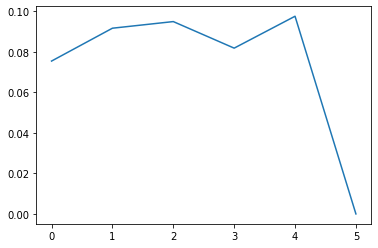

,count,mean,sum
children,,,
0,14091.000000,7.54%,1063.000000
1,4855.000000,9.17%,445.000000
2,2128.000000,9.49%,202.000000
3,330.000000,8.18%,27.000000
4,41.000000,9.76%,4.000000
5,9.000000,0.00%,0.000000


In [83]:
data_pivot = df_test.pivot_table(index=['children'], values='debt', aggfunc = {'debt':['sum','count','mean']})
plt.plot(data_pivot['mean'].reset_index(drop=True))
plt.show()
data_pivot = data_pivot.style.format({'mean': '{:.2%}'})
display(data_pivot)

<font color='DarkBlue'> 
📌 Присутствует прослеживающаяся зависимость между количеством детей и возвратом кредита в срок. Чем больше значение в поле 'debt', тем меньше вероятность выплаты долга. В рассматриваемой зависимости чем меньше детей, тем меньше вероятность возникновения задолженностей при оформлении новых кредитов, исходя из текущих данных. У клиентов, имеющих 4 ребенка, чаще имеются задолженности, и наоборот, у бездетных меньшее количество существующих догов по кредитам, следовательно есть вероятность того, что в таких семьях родители обычно не рассчиывают количество материальных затрат при появлении следующего ребенка или рожают для получения каких-либо льгот, а дети с 5 детьми предположительно уже являются обеспеченными и не имеют долгов, но выборка достаточно мала для однозначных выводов. Но клиенты, имеющие 3 детей выбиваются из общей картины по этому параметру, возможно для более точной картины необходимо рассмотреть беольшее количество подобных семей <br>
</font> 

##### Вопрос 2:

<font color='DarkBlue'> 
📌 Есть ли зависимость между семейным положением и возвратом кредита в срок? <br>
</font> 

##### Вывод 2:

In [84]:
data_pivot = df_test.pivot_table(index=['family_status_id'], values='debt', aggfunc = {'debt':['sum','count', 'mean']})
data_pivot['family_status'] = family_status_dict.loc[family_status_dict['family_status_id'] == data_pivot.index, 'family_status']
display(data_pivot.sort_values(by='mean', ascending=False).style.format({'mean': '{:.2%}'}))

,count,mean,sum,family_status
family_status_id,,,,
4,2810.000000,9.75%,274.000000,Не женат / не замужем
1,4151.000000,9.35%,388.000000,гражданский брак
0,12339.000000,7.55%,931.000000,женат / замужем
3,1195.000000,7.11%,85.000000,в разводе
2,959.000000,6.57%,63.000000,вдовец / вдова


<font color='DarkBlue'> 
📌 Присутствует следующая зависимость между семейным положением и возвратом кредита в срок. У тех, кто никогда не был женат или живет в гражданском браке, меньше вероятность возврата кредита в срок. Соответственно у улиентов в официальном браке вероятность возврата больше, а у находившихся в нем еще больше <br>
</font> 

##### Вопрос 3:

<font color='DarkBlue'> 
📌 Есть ли зависимость между уровнем дохода и возвратом кредита в срок? <br>
</font> 

##### Вывод 3:

In [85]:
data_pivot = df_test.pivot_table(index=['total_income_category'], values='debt', aggfunc = {'debt':['sum','count','mean']})
display(data_pivot.style.format({'mean': '{:.2%}'}))

,count,mean,sum
total_income_category,,,
A,25.000000,8.00%,2.000000
B,5041.000000,7.06%,356.000000
C,16016.000000,8.49%,1360.000000
D,350.000000,6.00%,21.000000
E,22.000000,9.09%,2.000000


<font color='DarkBlue'> 
📌 Зависимость между уровнем дохода и возвратом кредита в срок слабо прослеживается ввиду малого количества клиентов в выборках групп 'A','D' и 'E', возможно для более точного анализа следует изменить диапазоны значений для указанных групп. Судя по значениям в группах 'B' и 'C' можно слеать вывод о том, что при увеличении дохода вероятность выплаты кредита в срок повышается <br>
</font> 

##### Вопрос 4:

<font color='DarkBlue'> 
📌 Как разные цели кредита влияют на его возврат в срок? <br>
</font> 

##### Вывод 4:

In [86]:
data_pivot = df_test.pivot_table(index=['purpose_category'], values='debt', aggfunc = {'debt':['sum','count','mean']})
display(data_pivot.sort_values(by='mean', ascending=False).style.format({'mean': '{:.2%}'}))

,count,mean,sum
purpose_category,,,
операции с автомобилем,4306.000000,9.36%,403.000000
получение образования,4013.000000,9.22%,370.000000
проведение свадьбы,2324.000000,8.00%,186.000000
операции с недвижимостью,10811.000000,7.23%,782.000000


<font color='DarkBlue'> 
📌 Выборка распределена достаточно равномерно. Из данных в таблице можно сделать вывод о том, что в том случае, если целью кредита являются операции с недвижимостью, вероятность своевременной выплаты долга выше, чем у других категорий. Соответственно, если целью кредита являются операции с автомобилем или получение образования вероятность наиболее низкая <br>
</font> 

## Общий вывод:

<font color='DarkBlue'> 
📌 В ходе осуществленных исследований выявлено, что: <br>
    - предоставленные данные посредственного качества, содержится достаточное количество пропусков, ошибок и недостоверной информации, присутсвуют как технические ошибки в корректности данных, так и связанные с явлением человеческого фактора, возможно требуется задать дополнительные вопросы заказчику касательно аномальных значений данных в полях, в частности 'days_employed'; <br>
    - улучшено качество исходного датасета, удалены дубликаты и все отсутствующие и аномальные значения усреднены без использования фактора отклонения, создан готовый алгоритм для следующих преобразований исходных данных; <br>
    - вероятность возникновения задолженностей ниже у бездетных клиентов, в настроящее время или ранее находящихся в официальном браке, имеющих больший доход (желательно изменить диапазоны группировки) и в том случае, если целью кредита являются операции с недвижимостью <br>
</font> 

In [87]:
display(df_test.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.672852,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803711,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422852,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747070,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,480.722992,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
